In [3]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore
import shapely # type: ignore
from shapely.geometry import Point

import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore


%matplotlib inline

In [4]:
#Read EstSoil-EH

estsoil_12c = "Data\EstSoil-EH_v1.2c.shp\EstSoil-EH_v1.2c.shp"
data = gpd.read_file(estsoil_12c,encoding='utf-8')
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,...,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [5]:
#Drop soc1 soc2 soc3 soc4 values
no_soc_data = data.drop(["soc1","soc2","soc3","soc4"],axis=1)
no_soc_data.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'bd1', 'k1', 'awc1', 'z2', 'est_txt2',
       'lxtype2', 'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'bd2', 'k2',
       'awc2', 'z3', 'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3',
       'clay3', 'rock3', 'bd3', 'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4',
       'est_crs4', 'sand4', 'silt4', 'clay4', 'rock4', 'bd4', 'k4', 'awc4',
       'unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean',
       'twi_stdev', 'twi_median', 'slp_mean', 'slp_stdev', 'slp_median',
       'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass',
       'grassland_', 'area_wetla', 'wetland_pc', 'area_urban', 'urban_pct',
       'area_water', 'water_pct', 'area_other', 'other_pct', 'geometry'],
      dtype='object')

In [6]:
#Drop all unnecessary columns(ones which are calculated based on previous SOC data and the ones which are already exist in soc_samples data)
#before joining to soc_samples data


sorted_data = no_soc_data.drop(['wrb_code','wrb_main', 'nlayers', 'est_txt1', 'lxtype1', 'est_crs1', 'bd1', 'est_txt2', 'lxtype2', 
                    'est_crs2','bd2','k1','k2','est_txt3', 'lxtype3', 'est_crs3', 'bd3', 'k3', 'est_txt4','lxtype4','est_crs4',
                       'bd4', 'k4','unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean','twi_stdev', 'twi_median', 
                       'slp_mean', 'slp_stdev', 'slp_median',  'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
                       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass','grassland_', 'area_wetla', 
                       'wetland_pc', 'area_urban', 'urban_pct','area_water', 'water_pct', 'area_other', 'other_pct', 'geometry',
                       'awc1', 'awc2', 'awc3', 'awc4' ],axis=1)

sorted_data.head()



,orig_fid,est_soilty,est_txcode,zmx,z1,sand1,silt1,clay1,rock1,z2,...,z3,sand3,silt3,clay3,rock3,z4,sand4,silt4,clay4,rock4
0,0,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ag,l,1000.0,1000.0,90,5,5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# read soc data
soc_samples = gpd.read_file('Data\data_deposit_supplements_1.2c\data_deposit_supplements_1.2c\soc_rf_model\soc_rf_redone_3301.gpkg', layer = "soc_train_samples_outrem_origfid_avg")
soc_samples.head()


,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,...,20363.430457,89012.199332,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123)
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,...,0.000000,25583.014316,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518)
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,...,0.000000,1948.785206,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739)
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,...,526.615939,62036.861342,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836)
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',...,149612.185454,354413.777500,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,POINT (376404.901 6468198.723)


In [8]:
soc_samples.dtypes

orig_fid          int64
SOC_mean        float64
SOC_std         float64
SOC_med         float64
SOC_min         float64
                 ...   
wetland_pct     float64
urban_pct       float64
water_pct       float64
other_pct       float64
geometry       geometry
Length: 102, dtype: object

In [9]:
#merge dataframes of Soc_samples file and Estsoil-EH
merged_data = pd.merge(sorted_data, soc_samples, on= "orig_fid")
display(merged_data.sample(50))


,orig_fid,est_soilty,est_txcode,zmx,z1,sand1,silt1,clay1,rock1,z2,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
71,208183,Go1,ls₂50-85/+ls₂,1000.0,675.0,55,30,15,0,1000.0,...,0.000000,2.179370e+05,0.000000,99.557109,0.000000,0.442891,0.000000,0.000000,0.000000,POINT (546832.495 6475452.919)
142,258933,Kh'',r₂ls₁22-30/p,1000.0,260.0,65,20,15,15,1000.0,...,5469.493776,5.252775e+04,2.294705,87.292715,0.000000,0.000000,0.000000,0.000000,10.412581,POINT (424051.136 6453847.081)
260,384380,Kr,r₄ls,1000.0,1000.0,55,30,15,40,NaN,...,0.000000,1.616792e+04,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (561128.786 6578188.364)
330,450769,LIIg,l,1000.0,1000.0,90,5,5,0,NaN,...,0.000000,4.395372e+04,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (620893.342 6606655.834)
56,170081,Go,ls₁/p,1000.0,500.0,65,20,15,0,1000.0,...,0.000000,5.545929e+03,0.000000,52.827163,0.015420,0.000000,0.000000,47.157417,0.000000,POINT (471702.692 6500229.094)
379,563655,LP,k⁰₁sl40-70/k⁰₁ls₂,1000.0,550.0,82,9,9,6,1000.0,...,25808.083716,1.225973e+06,43.826581,48.916386,2.193319,0.000000,2.969386,0.000000,2.105110,POINT (665302.410 6461573.468)
279,438414,LI,pl200,2000.0,2000.0,90,3,7,0,NaN,...,7517.892340,9.308066e+04,0.000000,91.923250,0.000000,0.000000,0.000000,0.000000,8.076750,POINT (658401.470 6430475.607)
445,726642,R''',t₁150,1500.0,1500.0,25,25,50,0,NaN,...,0.000000,9.349131e+05,0.000000,1.932237,0.000000,98.067763,0.000000,0.000000,0.000000,POINT (622614.758 6515639.863)
98,231263,K,r₂ls₁30/r₃ls₁,1000.0,300.0,65,20,15,15,1000.0,...,0.000000,4.053306e+04,88.452629,1.569848,1.133867,0.000000,8.843656,0.000000,0.000000,POINT (600322.955 6564236.667)
316,426049,LG1,l90/ls,1000.0,900.0,90,5,5,0,1000.0,...,0.000000,5.916189e+04,8.511909,91.482444,0.005647,0.000000,0.000000,0.000000,0.000000,POINT (676252.820 6433310.553)


In [10]:
#columns and their types
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
merged_data.dtypes



orig_fid             int64
est_soilty          object
est_txcode          object
zmx                float64
z1                 float64
sand1                int64
silt1                int64
clay1                int64
rock1                int64
z2                 float64
sand2              float64
silt2              float64
clay2              float64
rock2              float64
z3                 float64
sand3              float64
silt3              float64
clay3              float64
rock3              float64
z4                 float64
sand4              float64
silt4              float64
clay4              float64
rock4              float64
SOC_mean           float64
SOC_std            float64
SOC_med            float64
SOC_min            float64
SOC_max            float64
origin              object
origin_p           float64
s_count              int64
upd_siffer          object
WRB_code            object
wrb_main            object
Boniteet             int64
Varv                 int64
L

In [11]:
#unnecessary columns for the RF model are being dropped
processed_data = merged_data.drop(['est_txcode','zmx', 'z2','sand2','silt2',
               'clay2', 'rock2', 'z3', 'sand3', 'silt3','clay3','rock3', 'z4', 'sand4', 'silt4', 'clay4', 'rock4',
               'SOC_std', 'SOC_med','SOC_min','SOC_max','origin','origin_p','s_count', 'WRB_code', 'Boniteet',
              'Loimis1','loimis_rec','SOL_Z2','SOL_Z3','SOL_Z4','EST_TXT2','LXTYPE2','EST_CRS2','SOL_SAND2','SOL_SILT2',
              'SOL_CLAY2', 'SOL_ROCK2','EST_TXT3','LXTYPE3','EST_CRS3','SOL_SAND3','SOL_SILT3','SOL_CLAY3','SOL_ROCK3',
              'EST_TXT4','LXTYPE4','EST_CRS4','SOL_SAND4','SOL_SILT4','SOL_CLAY4','SOL_ROCK4','SOL_SOC1','SOL_BD1',
              'SOL_BD2','SOL_SOC2','SOL_K2','SOL_AWC2','SOL_SOC3','SOL_BD3','SOL_K3','SOL_AWC3','SOL_SOC4','SOL_BD4',
              'SOL_K4','SOL_AWC4', 'USLE_K','HYDGRP','Huumus','unit_area',
              'geometry'], axis=1)

processed_data.rename(columns={'SOL_K1' : 'k1', 'SOL_ROCK1' : 'rock1','SOL_AWC1' : 'awc1' }, inplace=True)

processed_data.columns

Index(['orig_fid', 'est_soilty', 'z1', 'sand1', 'silt1', 'clay1', 'rock1',
       'SOC_mean', 'upd_siffer', 'wrb_main', 'Varv', 'nlayers', 'SOL_ZMX',
       'SOL_Z1', 'EST_TXT1', 'LXTYPE1', 'EST_CRS1', 'SOL_SAND1', 'SOL_SILT1',
       'SOL_CLAY1', 'rock1', 'k1', 'awc1', 'slp_mean', 'slp_median',
       'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev', 'ls_mean',
       'ls_median', 'ls_stdev', 'tri_mean', 'tri_median', 'tri_stdev',
       'area_drain', 'drain_pct', 'ao_hor_thick', 'ao_hor_type', 'ao_hor_sel',
       'area_arable', 'area_forest', 'area_grassland', 'area_wetland',
       'area_urban', 'area_water', 'area_other', 'arable_pct', 'forest_pct',
       'grassland_pct', 'wetland_pct', 'urban_pct', 'water_pct', 'other_pct'],
      dtype='object')

In [12]:
#cheking the null values
processed_data.isnull().sum()

orig_fid            0
est_soilty          0
z1                  0
sand1               0
silt1               0
clay1               0
rock1               0
SOC_mean            0
upd_siffer          0
wrb_main            0
Varv                0
nlayers             0
SOL_ZMX             0
SOL_Z1              0
EST_TXT1            0
LXTYPE1             0
EST_CRS1            0
SOL_SAND1           0
SOL_SILT1           0
SOL_CLAY1           0
rock1               0
k1                  0
awc1                0
slp_mean            0
slp_median          0
slp_stdev           0
twi_mean            0
twi_median          0
twi_stdev           0
ls_mean             0
ls_median           0
ls_stdev            0
tri_mean            0
tri_median          0
tri_stdev           0
area_drain        297
drain_pct         297
ao_hor_thick        0
ao_hor_type         0
ao_hor_sel          0
area_arable         0
area_forest         0
area_grassland      0
area_wetland        0
area_urban          0
area_water

In [13]:
#Filling missing values with the 0 of the respective columns

processed_data["area_drain"] = processed_data["area_drain"].fillna(0)  #fill with zero

processed_data["drain_pct"] = processed_data["drain_pct"].fillna(0) #fill with zero

processed_data.isnull().sum()

orig_fid          0
est_soilty        0
z1                0
sand1             0
silt1             0
clay1             0
rock1             0
SOC_mean          0
upd_siffer        0
wrb_main          0
Varv              0
nlayers           0
SOL_ZMX           0
SOL_Z1            0
EST_TXT1          0
LXTYPE1           0
EST_CRS1          0
SOL_SAND1         0
SOL_SILT1         0
SOL_CLAY1         0
rock1             0
k1                0
awc1              0
slp_mean          0
slp_median        0
slp_stdev         0
twi_mean          0
twi_median        0
twi_stdev         0
ls_mean           0
ls_median         0
ls_stdev          0
tri_mean          0
tri_median        0
tri_stdev         0
area_drain        0
drain_pct         0
ao_hor_thick      0
ao_hor_type       0
ao_hor_sel        0
area_arable       0
area_forest       0
area_grassland    0
area_wetland      0
area_urban        0
area_water        0
area_other        0
arable_pct        0
forest_pct        0
grassland_pct     0


In [14]:
#analyzing the "object" type columns
processed_data.select_dtypes(include=["object"])

,est_soilty,upd_siffer,wrb_main,EST_TXT1,LXTYPE1,EST_CRS1,ao_hor_type,ao_hor_sel
0,ArG,ArG,FL,ls1,SL,k⁰,no_info,single_h
1,D,D,UM,l,S,,no_info,single_h
2,Dg,Dg,UM,sl,LS,,no_info,single_h
3,E2o,E2o,RG,ls,L,v⁰,plain_huumus,single_h
4,Gh',Gh',LP,sl,LS,r,plain_huumus,single_h
...,...,...,...,...,...,...,...,...
467,S''',S''',HS,t3,PEAT,,no_info,single_h
468,TxR,TxR,HS,t1,PEAT,,no_info,single_h
469,TxR,TxR,HS,t1,PEAT,,no_info,single_h
470,TxR,TxR,HS,t1,PEAT,,no_info,single_h


In [15]:
# get dummies
dummy_processed_data = pd.get_dummies(processed_data, columns = ['est_soilty','upd_siffer','wrb_main','EST_TXT1','LXTYPE1',
                                                              'EST_CRS1','ao_hor_sel'], drop_first=True)
dummy_processed_data.rename(columns={'LXTYPE1_PEAT' : 'lxtype1_PEAT'}, inplace=True)
dummy_processed_data.info
dummy_processed_data.head()

,orig_fid,z1,sand1,silt1,clay1,rock1,SOC_mean,Varv,nlayers,SOL_ZMX,SOL_Z1,SOL_SAND1,SOL_SILT1,SOL_CLAY1,rock1,k1,awc1,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,ao_hor_thick,ao_hor_type,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,est_soilty_D,est_soilty_Dg,est_soilty_E2o,est_soilty_GI,est_soilty_GI1,est_soilty_Gh',est_soilty_Gh'',est_soilty_Gk,est_soilty_Gkr,est_soilty_Go,est_soilty_Go1,est_soilty_Gor,est_soilty_Gr,est_soilty_K,est_soilty_KI,est_soilty_KIg,est_soilty_Kg,est_soilty_Kh',est_soilty_Kh'',est_soilty_Kh''g,est_soilty_Kh'g,est_soilty_Kk,est_soilty_Ko,est_soilty_Kog,est_soilty_Korg,est_soilty_Kr,est_soilty_Krg,est_soilty_L(k)I,est_soilty_L(k)IIg,est_soilty_L(k)Ig,est_soilty_LG,est_soilty_LG1,est_soilty_LGn,est_soilty_LI,est_soilty_LII,est_soilty_LIIg,est_soilty_LIg,est_soilty_LP,est_soilty_LPG,est_soilty_LPg,est_soilty_LkG,est_soilty_LkI,est_soilty_LkII,est_soilty_LkIIg,est_soilty_LkIg,est_soilty_M'',est_soilty_M''',est_soilty_Pp,est_soilty_Pu,est_soilty_R''',est_soilty_S',est_soilty_S'',est_soilty_S''',est_soilty_TxR,upd_siffer_D,upd_siffer_Dg,upd_siffer_E2o,upd_siffer_GI,upd_siffer_GI1,upd_siffer_Gh',upd_siffer_Gh'',upd_siffer_Gk,upd_siffer_Gkr,upd_siffer_Go,upd_siffer_Go1,upd_siffer_Gor,upd_siffer_Gr,upd_siffer_K,upd_siffer_KI,upd_siffer_KIg,upd_siffer_Kg,upd_siffer_Kh',upd_siffer_Kh'',upd_siffer_Kh''g,upd_siffer_Kh'g,upd_siffer_Kk,upd_siffer_Ko,upd_siffer_Kog,upd_siffer_Korg,upd_siffer_Kr,upd_siffer_Krg,upd_siffer_L(k)I,upd_siffer_L(k)IIg,upd_siffer_L(k)Ig,upd_siffer_LG,upd_siffer_LG1,upd_siffer_LGn,upd_siffer_LI,upd_siffer_LII,upd_siffer_LIIg,upd_siffer_LIg,upd_siffer_LP,upd_siffer_LPG,upd_siffer_LPg,upd_siffer_LkG,upd_siffer_LkI,upd_siffer_LkII,upd_siffer_LkIIg,upd_siffer_LkIg,upd_siffer_M'',upd_siffer_M''',upd_siffer_Pp,upd_siffer_Pu,upd_siffer_R''',upd_siffer_S',upd_siffer_S'',upd_siffer_S''',upd_siffer_TxR,wrb_main_FL,wrb_main_GL,wrb_main_HS,wrb_main_LP,wrb_main_LV,wrb_main_PZ,wrb_main_RG,wrb_main_RT,wrb_main_TC,wrb_main_UM,EST_TXT1_l,EST_TXT1_ls,EST_TXT1_ls1,EST_TXT1_ls2,EST_TXT1_pl,EST_TXT1_r,EST_TXT1_s,EST_TXT1_sl,EST_TXT1_sl1,EST_TXT1_t1,EST_TXT1_t2,EST_TXT1_t3,EST_TXT1_tls,EST_TXT1_tsl,EST_TXT1_v3,EST_TXT1_v5,LXTYPE1_GRAVELS,LXTYPE1_L,LXTYPE1_LS,lxtype1_PEAT,LXTYPE1_S,LXTYPE1_SL,LXTYPE1_SiL,EST_CRS1_k,EST_CRS1_kb,EST_CRS1_kr,EST_CRS1_k⁰,EST_CRS1_r,EST_CRS1_v,EST_CRS1_v⁰,ao_hor_sel_single_h
0,15159,1000.0,65,20,15,25,11.078491,15,1.0,1000.0,1000.0,65,20,15,25,11.02,0.195208,1.169605,0.910082,0.901063,9.929913,9.657865,1.696798,5.253636,0.279295,10.367961,1.392533e+23,1.575201e+23,6.919626e+23,0.0,0.00,0.0,no_info,186.081469,26892.148947,40509.107083,14651.735166,0.000000,1061.431376,20363.430457,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,22283,1000.0,90,5,5,0,1.056000,19,1.0,1000.0,1000.0,90,5,5,0,133.21,0.181111,4.684322,4.218450,1.924464,7.979711,7.997821,1.189848,1.067075,0.863344,0.509742,3.796084e+00,3.947504e+00,1.222080e+00,0.0,0.00,0.0,no_info,11451.209081,14131.805235,0.000000,0.000000,0.000000,0.000000,0.000000,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,45116,1000.0,82,9,9,0,5.339205,19,1.0,1000.0,1000.0,82,9,9,0,37.54,0.191667,2.132079,1.824831,1.1551

In [16]:
#  generating dummy variables separately for "ao_hor_type" to remove spesifically "no_info" column
ao_hor_type = pd.get_dummies(processed_data['ao_hor_type'])
ao_hor_type.head()

,kodu_depth_range,no_info,plain_huumus,t,th
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [17]:
#  generating dummy variables for "ao_hor_type" to remove spesifically "no_info" value
ao_hor_type_noinf = ao_hor_type.drop(["no_info"], axis=1)
ao_hor_type_noinf.head()

,kodu_depth_range,plain_huumus,t,th
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,1,0,0


In [18]:
#merging back ao_hor_type_noinf to dummy_processed_data
dummy_processed_data = pd.concat([dummy_processed_data,ao_hor_type_noinf], axis =1)
dummy_processed_data.head()

,orig_fid,z1,sand1,silt1,clay1,rock1,SOC_mean,Varv,nlayers,SOL_ZMX,SOL_Z1,SOL_SAND1,SOL_SILT1,SOL_CLAY1,rock1,k1,awc1,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,ao_hor_thick,ao_hor_type,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,est_soilty_D,est_soilty_Dg,est_soilty_E2o,est_soilty_GI,est_soilty_GI1,est_soilty_Gh',est_soilty_Gh'',est_soilty_Gk,est_soilty_Gkr,est_soilty_Go,est_soilty_Go1,est_soilty_Gor,est_soilty_Gr,est_soilty_K,est_soilty_KI,est_soilty_KIg,est_soilty_Kg,est_soilty_Kh',est_soilty_Kh'',est_soilty_Kh''g,est_soilty_Kh'g,est_soilty_Kk,est_soilty_Ko,est_soilty_Kog,est_soilty_Korg,est_soilty_Kr,est_soilty_Krg,est_soilty_L(k)I,est_soilty_L(k)IIg,est_soilty_L(k)Ig,est_soilty_LG,est_soilty_LG1,est_soilty_LGn,est_soilty_LI,est_soilty_LII,est_soilty_LIIg,est_soilty_LIg,est_soilty_LP,est_soilty_LPG,est_soilty_LPg,est_soilty_LkG,est_soilty_LkI,est_soilty_LkII,est_soilty_LkIIg,est_soilty_LkIg,est_soilty_M'',est_soilty_M''',est_soilty_Pp,est_soilty_Pu,est_soilty_R''',est_soilty_S',est_soilty_S'',est_soilty_S''',est_soilty_TxR,upd_siffer_D,upd_siffer_Dg,upd_siffer_E2o,upd_siffer_GI,upd_siffer_GI1,upd_siffer_Gh',upd_siffer_Gh'',upd_siffer_Gk,upd_siffer_Gkr,upd_siffer_Go,upd_siffer_Go1,upd_siffer_Gor,upd_siffer_Gr,upd_siffer_K,upd_siffer_KI,upd_siffer_KIg,upd_siffer_Kg,upd_siffer_Kh',upd_siffer_Kh'',upd_siffer_Kh''g,upd_siffer_Kh'g,upd_siffer_Kk,upd_siffer_Ko,upd_siffer_Kog,upd_siffer_Korg,upd_siffer_Kr,upd_siffer_Krg,upd_siffer_L(k)I,upd_siffer_L(k)IIg,upd_siffer_L(k)Ig,upd_siffer_LG,upd_siffer_LG1,upd_siffer_LGn,upd_siffer_LI,upd_siffer_LII,upd_siffer_LIIg,upd_siffer_LIg,upd_siffer_LP,upd_siffer_LPG,upd_siffer_LPg,upd_siffer_LkG,upd_siffer_LkI,upd_siffer_LkII,upd_siffer_LkIIg,upd_siffer_LkIg,upd_siffer_M'',upd_siffer_M''',upd_siffer_Pp,upd_siffer_Pu,upd_siffer_R''',upd_siffer_S',upd_siffer_S'',upd_siffer_S''',upd_siffer_TxR,wrb_main_FL,wrb_main_GL,wrb_main_HS,wrb_main_LP,wrb_main_LV,wrb_main_PZ,wrb_main_RG,wrb_main_RT,wrb_main_TC,wrb_main_UM,EST_TXT1_l,EST_TXT1_ls,EST_TXT1_ls1,EST_TXT1_ls2,EST_TXT1_pl,EST_TXT1_r,EST_TXT1_s,EST_TXT1_sl,EST_TXT1_sl1,EST_TXT1_t1,EST_TXT1_t2,EST_TXT1_t3,EST_TXT1_tls,EST_TXT1_tsl,EST_TXT1_v3,EST_TXT1_v5,LXTYPE1_GRAVELS,LXTYPE1_L,LXTYPE1_LS,lxtype1_PEAT,LXTYPE1_S,LXTYPE1_SL,LXTYPE1_SiL,EST_CRS1_k,EST_CRS1_kb,EST_CRS1_kr,EST_CRS1_k⁰,EST_CRS1_r,EST_CRS1_v,EST_CRS1_v⁰,ao_hor_sel_single_h,kodu_depth_range,plain_huumus,t,th
0,15159,1000.0,65,20,15,25,11.078491,15,1.0,1000.0,1000.0,65,20,15,25,11.02,0.195208,1.169605,0.910082,0.901063,9.929913,9.657865,1.696798,5.253636,0.279295,10.367961,1.392533e+23,1.575201e+23,6.919626e+23,0.0,0.00,0.0,no_info,186.081469,26892.148947,40509.107083,14651.735166,0.000000,1061.431376,20363.430457,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,22283,1000.0,90,5,5,0,1.056000,19,1.0,1000.0,1000.0,90,5,5,0,133.21,0.181111,4.684322,4.218450,1.924464,7.979711,7.997821,1.189848,1.067075,0.863344,0.509742,3.796084e+00,3.947504e+00,1.222080e+00,0.0,0.00,0.0,no_info,11451.209081,14131.805235,0.000000,0.000000,0.000000,0.000000,0.000000,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,45116,1000.0,82,9,9,0,5.339205,19,1.0,1000.0,1000

In [19]:
#finally deleting categorical columns(ao_hor_type) from the dataset. 
processed_data_done = dummy_processed_data.drop(['ao_hor_type'], axis=1)
processed_data_done.head()
processed_data_done.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 472 entries, 0 to 471
Columns: 199 entries, orig_fid to th
dtypes: float64(36), int64(10), uint8(153)
memory usage: 243.8 KB


In [20]:
#making sure that neither categorical column left 
processed_data_done.select_dtypes(include=["object"])

""
0
1
2
3
4
...
467
468
469
470


In [21]:
#Splitting data for machine learning

y = np.array(processed_data_done['SOC_mean'])

x = processed_data_done.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')


x : (472, 198)
y : (472,)


In [22]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

In [23]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (354, 198)
y_tain : (354,)
x_test : (118, 198)
y_test : (118,)


In [24]:
# Basic Random Forest model
from sklearn.ensemble import RandomForestRegressor 
rf_Model = RandomForestRegressor()
rf_Model.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {rf_Model.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(x_test,y_test):.3f}')

Train Accuracy - : 0.968
Test Accuracy - : 0.745


In [26]:
y_predict = rf_Model.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.7453441147412199


In [27]:
# Building parameters and their distributions for RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = list(np.linspace(start=10, stop=100, num=10, dtype=int))
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = list(np.linspace(start=10, stop=100, num=10, dtype=int))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create dictionary from parameters
param_distributions = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}


In [28]:
# Perform search for hyperparameters (RandomizedSearchCV)
estimator = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=estimator, param_distributions=param_distributions, n_iter=100, verbose=2, random_state=101,
    n_jobs=-1
)

In [29]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=101, verbose=2)

In [30]:
#Best parameters using RandomizedSearchCV
params = rf_random.best_params_
params['bootstrap'] = True
params['oob_score'] = True
params

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True,
 'oob_score': True}

In [31]:
# Fit parameters to the model (RandomizedSearchCV)
regressor = RandomForestRegressor()
regressor.set_params(**params)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=80, max_features='sqrt', min_samples_split=10,
                      n_estimators=40, oob_score=True)

In [32]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.914
Test Accuracy - : 0.736


In [33]:
y_predict = regressor.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)


R-Square Error associated with Random Forest Regression is: 0.7358637488220304


In [34]:
#predicted SOC values
y_predict

array([ 4.90627882, 10.56137406,  7.64024455,  4.8824909 ,  8.68333955,
        4.04198042,  2.67017458,  3.24882895,  3.16217041, 21.4801194 ,
        4.27286138, 10.16562879, 19.85656102,  7.87961567,  6.54439206,
        3.24191246,  3.32536336,  3.38128928,  2.36861465,  1.32246614,
       10.02326042,  5.64381769,  6.85265795,  1.9307373 ,  1.76655002,
        4.43371301,  7.51318537,  3.58365133,  3.60913145,  5.63299838,
        6.87587983,  3.4109703 ,  6.8337261 , 25.60612129,  2.36909931,
        3.92129628,  8.54015457,  7.47838908,  2.7989624 ,  4.12689015,
        3.0579391 , 28.50420242,  2.63965347,  8.86698033,  6.47635602,
        4.20376   ,  3.62532476,  2.34329549,  2.30873304,  6.50564326,
        2.61247246,  5.3632141 ,  3.27819878,  7.7089604 ,  3.40610509,
        2.22685874, 28.17600253,  4.79598747,  8.36146361,  7.64913915,
        7.02028269,  2.82064446,  3.21289309,  7.17278806,  5.25794134,
        4.95879506,  3.8321031 ,  2.84306552,  3.76630285,  3.20

In [35]:
#Mean square error evaluation
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error associated with Random Forest Regression is:',np.sqrt(mean_squared_error(y_test, y_predict)) )

Root Mean Squared Error associated with Random Forest Regression is: 4.3346945142068645


In [36]:
# model_ranks = pd.Series(regressor.feature_importances_, index = x_train.columns, name = "Importance")

feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_train.columns,
                                   columns = ["importance"]).sort_values("importance", ascending = False)
feature_importances


,importance
clay1,1.154878e-01
wrb_main_HS,1.137604e-01
orig_fid,9.522086e-02
lxtype1_PEAT,7.657306e-02
SOL_CLAY1,7.508324e-02
sand1,6.722197e-02
SOL_SAND1,4.141187e-02
area_wetland,4.093169e-02
est_soilty_R''',2.490421e-02
SOL_ZMX,1.867693e-02


In [37]:
#Splitting data for machine learning

y = np.array(processed_data_done['SOC_mean'])

x = processed_data_done.drop(["SOC_mean","EST_TXT1_ls2","upd_siffer_M'''","upd_siffer_LPG","upd_siffer_M''","upd_siffer_S'''","upd_siffer_LkIg",
                             "upd_siffer_LkIIg","upd_siffer_LkII","upd_siffer_LkI","EST_TXT1_v5","upd_siffer_LPg","upd_siffer_LP",
                             "upd_siffer_Pp","LXTYPE1_GRAVELS","upd_siffer_LIg","upd_siffer_LIIg", "upd_siffer_LII", "upd_siffer_LI",
                             "upd_siffer_LI","upd_siffer_LGn","upd_siffer_LG1", "upd_siffer_LG1", "LXTYPE1_L", "upd_siffer_LG",
                             "t","upd_siffer_Pu", "upd_siffer_Pu","EST_TXT1_r", "EST_TXT1_t2","LXTYPE1_SiL", "EST_TXT1_s",
                             "wrb_main_TC","EST_CRS1_k","EST_TXT1_sl", "EST_TXT1_sl1","EST_CRS1_kr","EST_CRS1_k⁰", "EST_TXT1_t1",
                             "upd_siffer_L(k)IIg","EST_TXT1_v3", "EST_TXT1_t3", "wrb_main_FL","EST_TXT1_tls","upd_siffer_S'''",
                              "upd_siffer_S''","EST_TXT1_tsl", "kodu_depth_range","upd_siffer_S'", "upd_siffer_R'''","upd_siffer_L(k)Ig",
                              "upd_siffer_Gh''","upd_siffer_L(k)I", "est_soilty_Kh'g","est_soilty_Kk", "est_soilty_Ko", "est_soilty_Kog",
                              "est_soilty_Krg", "est_soilty_Korg","est_soilty_L(k)IIg","est_soilty_Kh''","est_soilty_L(k)Ig","est_soilty_LG",
                              "est_soilty_LG1", "est_soilty_LGn", "est_soilty_LI", "est_soilty_LII", "est_soilty_Kh''g","est_soilty_Kh'",
                              "upd_siffer_Krg","est_soilty_Gk", "est_soilty_D","est_soilty_Dg", "est_soilty_E2o", "est_soilty_GI1",
                              "est_soilty_Gh'","est_soilty_Gh''", "est_soilty_Gkr", "est_soilty_Kg","est_soilty_Go","est_soilty_Go1",
                              "est_soilty_Gor", "est_soilty_Gr", "est_soilty_K", "est_soilty_KIg", "est_soilty_LIIg","est_soilty_LIg",
                              "est_soilty_LPG", "upd_siffer_Kg", "upd_siffer_Go", "upd_siffer_Go1", "upd_siffer_Gor", "upd_siffer_Gr",
                              "upd_siffer_K", "upd_siffer_KIg", "upd_siffer_Kh'", "est_soilty_LPg", "upd_siffer_Kh''g", "upd_siffer_Kh'g",
                              "upd_siffer_Kk", "upd_siffer_Ko", "upd_siffer_Kog", "upd_siffer_Korg","upd_siffer_Gkr", "upd_siffer_Gk",
                              "upd_siffer_Gh'","upd_siffer_GI1","upd_siffer_E2o", "upd_siffer_Dg", "est_soilty_S'''", "est_soilty_S''",
                              "est_soilty_S'", "est_soilty_R'''", "est_soilty_Pu", "est_soilty_Pp", "est_soilty_M'''", "est_soilty_M''",
                              "est_soilty_LkIg", "est_soilty_LkIIg", "est_soilty_LkII", "upd_siffer_D", "est_soilty_KI","upd_siffer_KI",
                              "est_soilty_LkI","LXTYPE1_SL","wrb_main_LV","est_soilty_L(k)I","wrb_main_RT","est_soilty_LkG","LXTYPE1_LS",
                              "wrb_main_LV","est_soilty_L(k)I","wrb_main_RT","est_soilty_LkG","LXTYPE1_LS","est_soilty_TxR","est_soilty_LP",
                              "est_soilty_Kr","EST_TXT1_ls","upd_siffer_Kh''","EST_TXT1_ls1","EST_CRS1_r","EST_TXT1_pl","wrb_main_UM",
                              "EST_CRS1_v","est_soilty_GI","nlayers","EST_TXT1_l","LXTYPE1_S","upd_siffer_GI","upd_siffer_LkG",
                              "wrb_main_RG","EST_CRS1_v⁰","area_urban","upd_siffer_Kr","EST_CRS1_kb","wrb_main_PZ","water_pct","slp_stdev",
                              "area_other","ao_hor_sel_single_h","wrb_main_GL","other_pct", "tri_stdev", "wrb_main_LP","ls_mean","rock1",
                              "upd_siffer_TxR","ls_stdev","plain_huumus","area_water", "SOL_SILT1","silt1","th","slp_median","SOL_Z1","z1",
                              "area_arable", "urban_pct","twi_stdev", "SOL_ZMX",
                              "SOL_CLAY1", "SOL_SAND1", "Varv", "ao_hor_thick"
                              
                              
                              
                              
                              
                              
                              
                             ], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')

x : (472, 22)
y : (472,)


In [38]:
#Rerunning model after dropping unimportant values
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

In [39]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=80, max_features='sqrt', min_samples_split=10,
                      n_estimators=40, oob_score=True)

 <h1>Training Model Evaluation<h1>

In [40]:
y_predict_train = regressor.predict((x_train))

#Model Evaluation using R-Square for Random Forest Regression
print('Regression score is: %.2f'%regressor.score(x_train,y_train))

#or

# The score for our Random Forest Regressor model is 0.76 which is pretty good.
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)

Regression score is: 0.91
R-Square Error associated with Random Forest Regression is: 0.7358637488220304


In [41]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))      


The MAE is: 1.48


In [42]:
#Mean square error evaluation
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep_train = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep_train)

Root Mean Squared Error associated with Random Forest Regression is: 2.31
Root Mean Squared Error in percentage: 1.55


In [43]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))   

The EVS is: 0.91


In [44]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.914
Test Accuracy - : 0.753


 <h1>Test Model Evaluation<h1>

In [45]:
y_predict = regressor.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

#or

# The score for our Random Forest Regressor model is 0.76 which is pretty good.
print('Regression score is: %.2f'%regressor.score(x_test,y_test))

R-Square Error associated with Random Forest Regression is: 0.75
Regression score is: 0.75


In [46]:
#Mean absolute error evaluation

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict))      


The MAE is: 2.78


In [47]:
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 4.19
Root Mean Squared Error in percentage: 2.11


In [48]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict))    

The EVS is: 0.76


In [49]:
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.914
Test Accuracy - : 0.753


<function matplotlib.pyplot.show(close=None, block=None)>

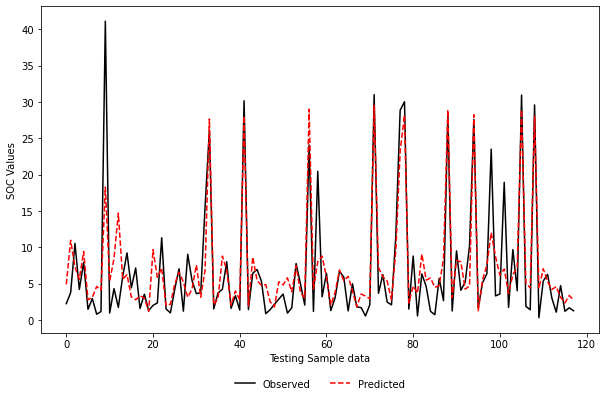

In [50]:
#plotting results of observed/predicted sample data after dropping unnecessary columns defined by feature importance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(x_test))

plt.plot(x_ax,y_test, label ="Observed", color = "k", linestyle = "-")
plt.plot(x_ax,y_predict, label ="Predicted", color = "r", linestyle = "--")
plt.ylabel("SOC Values")
plt.xlabel("Testing Sample data")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = "lower center", ncol =2, frameon = False)
plt.show

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


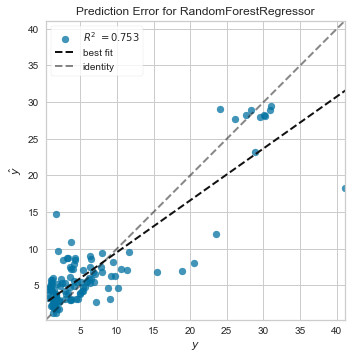

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [51]:
#Plotting the prediction errors

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()
# y axes predicted values   x axes the observed values

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


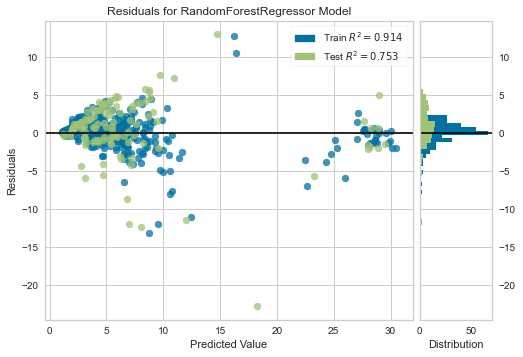

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

In [53]:
#feature importance
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_train.columns,
                                   columns = ["importance"]).sort_values("importance", ascending = False)
feature_importances


,importance
lxtype1_PEAT,0.167407
orig_fid,0.141549
wetland_pct,0.100371
clay1,0.093001
wrb_main_HS,0.082437
area_wetland,0.079679
k1,0.053633
sand1,0.053021
grassland_pct,0.030892
arable_pct,0.026754


In [54]:
import shap

# Fits the explainer
explainer = shap.Explainer(regressor.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 119it [00:13,  2.75it/s]                                                                        


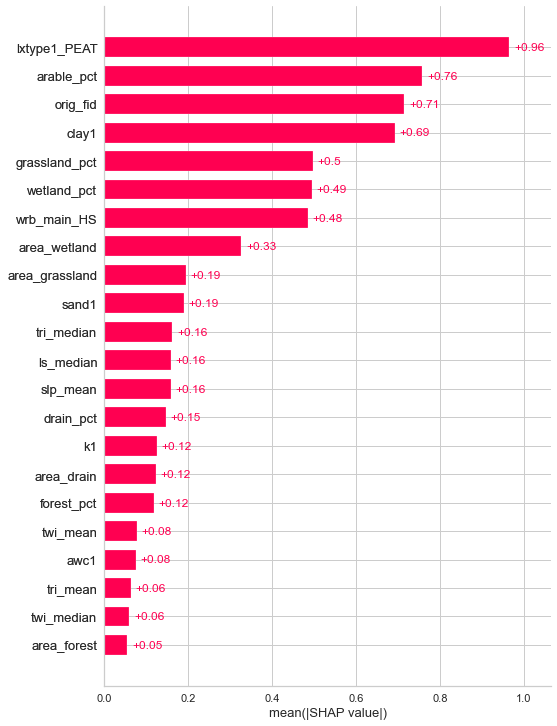

In [55]:
#Bar plot
shap.plots.bar(shap_values, max_display=22)

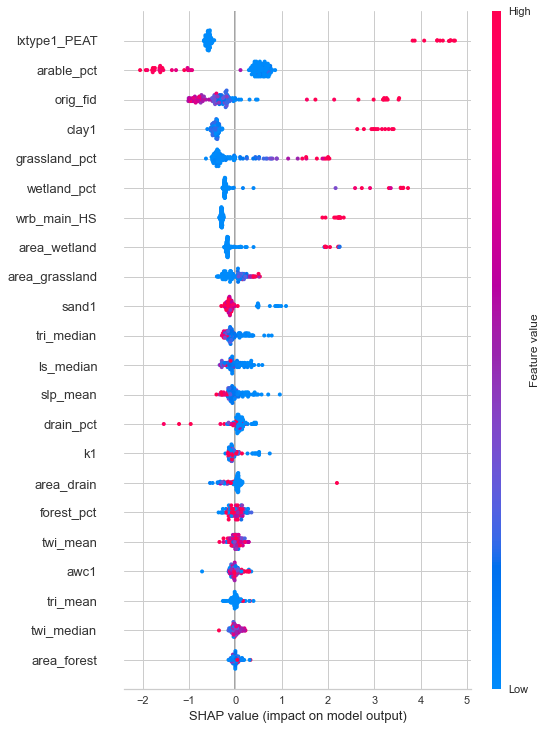

In [56]:
#Summary plot: beeswarm
shap.summary_plot(shap_values, max_display=22)

<h1>Preparing data for counting and plotting residuals<h1>

In [57]:
soc_samples.head()
soc_samples.shape

(472, 102)

In [58]:
soc_sample_res = soc_samples

In [59]:
list(soc_samples.columns)

['orig_fid',
 'SOC_mean',
 'SOC_std',
 'SOC_med',
 'SOC_min',
 'SOC_max',
 'origin',
 'origin_p',
 's_count',
 'upd_siffer',
 'WRB_code',
 'wrb_main',
 'Boniteet',
 'Varv',
 'Loimis1',
 'loimis_rec',
 'nlayers',
 'SOL_ZMX',
 'SOL_Z1',
 'SOL_Z2',
 'SOL_Z3',
 'SOL_Z4',
 'EST_TXT1',
 'LXTYPE1',
 'EST_CRS1',
 'SOL_SAND1',
 'SOL_SILT1',
 'SOL_CLAY1',
 'SOL_ROCK1',
 'EST_TXT2',
 'LXTYPE2',
 'EST_CRS2',
 'SOL_SAND2',
 'SOL_SILT2',
 'SOL_CLAY2',
 'SOL_ROCK2',
 'EST_TXT3',
 'LXTYPE3',
 'EST_CRS3',
 'SOL_SAND3',
 'SOL_SILT3',
 'SOL_CLAY3',
 'SOL_ROCK3',
 'EST_TXT4',
 'LXTYPE4',
 'EST_CRS4',
 'SOL_SAND4',
 'SOL_SILT4',
 'SOL_CLAY4',
 'SOL_ROCK4',
 'SOL_SOC1',
 'SOL_BD1',
 'SOL_K1',
 'SOL_AWC1',
 'SOL_BD2',
 'SOL_SOC2',
 'SOL_K2',
 'SOL_AWC2',
 'SOL_SOC3',
 'SOL_BD3',
 'SOL_K3',
 'SOL_AWC3',
 'SOL_SOC4',
 'SOL_BD4',
 'SOL_K4',
 'SOL_AWC4',
 'USLE_K',
 'HYDGRP',
 'slp_mean',
 'slp_median',
 'slp_stdev',
 'twi_mean',
 'twi_median',
 'twi_stdev',
 'ls_mean',
 'ls_median',
 'ls_stdev',
 'tri_mean',
 '

In [60]:

#editing typos in column names
soc_sample_res.rename(columns={'SOL_CLAY1' : 'clay1', 'SOL_SAND1' : 'sand1','SOL_K1':'k1',  'LXTYPE1': 'lxtype1','SOL_AWC1': 'awc1'  }, inplace=True)


In [61]:
soc_sample_res["drain_pct"] = soc_sample_res["drain_pct"].fillna(0)
soc_sample_res["area_drain"] = soc_sample_res["area_drain"].fillna(0)

In [62]:
#one-hot encoding
soc_sample_res_dum = pd.get_dummies(soc_sample_res, columns = ["wrb_main","lxtype1"], drop_first=True)
soc_sample_res_dum.info
soc_sample_res_dum.head()

,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,WRB_code,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,EST_TXT1,EST_CRS1,sand1,SOL_SILT1,clay1,SOL_ROCK1,EST_TXT2,LXTYPE2,EST_CRS2,SOL_SAND2,SOL_SILT2,SOL_CLAY2,SOL_ROCK2,EST_TXT3,LXTYPE3,EST_CRS3,SOL_SAND3,SOL_SILT3,SOL_CLAY3,SOL_ROCK3,EST_TXT4,LXTYPE4,EST_CRS4,SOL_SAND4,SOL_SILT4,SOL_CLAY4,SOL_ROCK4,SOL_SOC1,SOL_BD1,k1,awc1,SOL_BD2,SOL_SOC2,SOL_K2,SOL_AWC2,SOL_SOC3,SOL_BD3,SOL_K3,SOL_AWC3,SOL_SOC4,SOL_BD4,SOL_K4,SOL_AWC4,USLE_K,HYDGRP,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,Huumus,ao_hor_thick,ao_hor_type,ao_hor_sel,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry,wrb_main_FL,wrb_main_GL,wrb_main_HS,wrb_main_LP,wrb_main_LV,wrb_main_PZ,wrb_main_RG,wrb_main_RT,wrb_main_TC,wrb_main_UM,lxtype1_GRAVELS,lxtype1_L,lxtype1_LS,lxtype1_PEAT,lxtype1_S,lxtype1_SL,lxtype1_SiL
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,FL-gl.wso,25,15,k⁰₃ls₁,k⁰₃ls₁,1.0,1000.0,1000.0,0.0,0.0,0.0,ls1,k⁰,65,20,15,25,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,7.833804,0.926569,11.02,0.195208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115463,B,1.169605,0.910082,0.901063,9.929913,9.657865,1.696798,5.253636,0.279295,10.367961,1.392533e+23,1.575201e+23,6.919626e+23,0.0,0.00,None,0.0,no_info,single_h,186.081469,26892.148947,40509.107083,14651.735166,0.000000,1061.431376,20363.430457,89012.199332,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,UM-dl.hp,40,19,l,l,1.0,1000.0,1000.0,0.0,0.0,0.0,l,,90,5,5,0,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,4.964108,1.102195,133.21,0.181111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303838,A,4.684322,4.218450,1.924464,7.979711,7.997821,1.189848,1.067075,0.863344,0.509742,3.796084e+00,3.947504e+00,1.222080e+00,0.0,0.00,None,0.0,no_info,single_h,11451.209081,14131.805235,0.000000,0.000000,0.000000,0.000000,0.000000,25583.014316,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518),0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,UM-dl.gln,43,19,sl,sl,1.0,1000.0,1000.0,0.0,0.0,0.0,sl,,82,9,9,0,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,5.683822,1.052177,37.54,0.191667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236537,A,2.132079,1.824831,1.155190,7.091621,6.264889,1.521681,0.455225,0.602095,0.229011,3.376664e+00,3.284537e+00,3.719893e-01,0.0,0.00,None,0.0,no_info,single_h,0.000000,1948.785206,0.000000,0.000000,0.000000,0.000000,0.000000,1948.785206,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739),0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,RG-br.eu,39,18,v⁰₁ls,v⁰₁ls,1.0,1000.0,1000.0,0.0,0.0,0.0,ls,v⁰,55,30,15,6,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,4.096879,1.169166,9.04,0.185333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325275,B,1.856459,1.629892,1.202796,6.851544,6.750208,0.904073,0.258317,0.177129,0.252912,1.921934e+00,1.777000e+00,7.756198e-01,13859.0,22.34,10-20,150.0,plain_huumus,single_h,50969.620733,7505.976949,0.000000,0.000000,3034.647721,0.000000,526.615939,62036.861342,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836),0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',LP-li.ca-gl,20,13,r₃sl;r₁l5-18/p,r₃sl,1.0,1000.0,1000.0,0.0,0.0,0.0,sl,r,82,9,9,25,,,,0,0,0,0,,,,0,0,0,0,,,,0

In [63]:
# selecting required columns
soc_sample_res_fin = soc_sample_res_dum[["wrb_main_HS","clay1","orig_fid", "lxtype1_PEAT","wetland_pct","sand1","k1","tri_median", "grassland_pct",
                    "ls_median", "twi_median","arable_pct", "tri_mean", "forest_pct","twi_mean", "drain_pct","slp_mean",
                    "awc1","area_grassland","area_forest","area_drain","area_wetland"]]
soc_sample_res_fin 

,wrb_main_HS,clay1,orig_fid,lxtype1_PEAT,wetland_pct,sand1,k1,tri_median,grassland_pct,ls_median,twi_median,arable_pct,tri_mean,forest_pct,twi_mean,drain_pct,slp_mean,awc1,area_grassland,area_forest,area_drain,area_wetland
0,0,15,15159,0,16.460368,65,11.02,1.575201e+23,45.509613,0.279295,9.657865,0.209052,1.392533e+23,30.211757,9.929913,0.000,1.169605,0.195208,40509.107083,26892.148947,0.0,14651.735166
1,0,5,22283,0,0.000000,90,133.21,3.947504e+00,0.000000,0.863344,7.997821,44.760985,3.796084e+00,55.239015,7.979711,0.000,4.684322,0.181111,0.000000,14131.805235,0.0,0.000000
2,0,9,45116,0,0.000000,82,37.54,3.284537e+00,0.000000,0.602095,6.264889,0.000000,3.376664e+00,100.000000,7.091621,0.000,2.132079,0.191667,0.000000,1948.785206,0.0,0.000000
3,0,15,86756,0,0.000000,55,9.04,1.777000e+00,0.000000,0.177129,6.750208,82.160218,1.921934e+00,12.099221,6.851544,22.340,1.856459,0.185333,0.000000,7505.976949,13859.0,0.000000
4,0,9,94817,0,0.000000,82,37.54,3.210009e-01,0.693469,0.033145,9.025871,0.515653,4.843221e-01,56.275738,9.348648,0.000,0.563358,0.188772,2457.748481,199448.969757,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,70,743897,1,19.334323,15,9.20,2.386114e-01,0.000000,0.033135,11.247402,0.000000,3.404102e-01,80.665677,11.346289,3.583,0.425885,0.193909,0.000000,918850.772236,40814.0,220234.401899
468,1,50,745489,1,97.781608,25,5.09,8.005230e-01,0.000000,0.020563,10.061668,0.000000,8.062253e-01,0.488021,10.668461,0.000,0.772469,0.197632,0.000000,2749.589735,0.0,550917.153321
469,1,50,745507,1,96.349406,25,5.09,5.039972e-01,0.000000,0.004326,10.271890,0.000000,5.571132e-01,2.540230,10.696100,0.000,0.475692,0.198070,0.000000,15893.860211,0.0,602844.653179
470,1,50,745510,1,99.140638,25,5.09,2.249178e-01,0.000000,0.021481,10.271992,0.000000,2.941446e-01,0.859362,10.456750,0.000,0.274565,0.198958,0.000000,3673.346712,0.0,423777.045537


In [64]:
# running model on final data
val = soc_sample_res_fin.values

display(val.shape)
Prediction = regressor.predict(val)

soc_sample_res['SOC_pred'] = Prediction

display(soc_sample_res.sample(10))

(472, 22)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,WRB_code,wrb_main,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,EST_TXT1,lxtype1,EST_CRS1,sand1,SOL_SILT1,clay1,SOL_ROCK1,EST_TXT2,LXTYPE2,EST_CRS2,SOL_SAND2,SOL_SILT2,SOL_CLAY2,SOL_ROCK2,EST_TXT3,LXTYPE3,EST_CRS3,SOL_SAND3,SOL_SILT3,SOL_CLAY3,SOL_ROCK3,EST_TXT4,LXTYPE4,EST_CRS4,SOL_SAND4,SOL_SILT4,SOL_CLAY4,SOL_ROCK4,SOL_SOC1,SOL_BD1,k1,awc1,SOL_BD2,SOL_SOC2,SOL_K2,SOL_AWC2,SOL_SOC3,SOL_BD3,SOL_K3,SOL_AWC3,SOL_SOC4,SOL_BD4,SOL_K4,SOL_AWC4,USLE_K,HYDGRP,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,Huumus,ao_hor_thick,ao_hor_type,ao_hor_sel,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry,SOC_pred
397,583228,2.777455,NaN,2.777455,2.777455,2.777455,rmk_soil_data.shp,1.00,1,LP,UM-rt.lv,UM,46,6,sl80/ls₂,sl80/ls₂,2.0,1000.0,800.0,1000.0,0.0,0.0,sl,LS,,82,9,9,0,ls2,L,,55,30,15,0,,,,0,0,0,0,,,,0,0,0,0,4.926425,1.104945,37.54,0.190286,1.096797,5.038627,9.04,0.177143,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.295688,A,2.082480,1.868056,1.131117,7.367052,6.748078,1.992364,0.340201,0.280365,0.252336,1.972151e+00,1.860417,6.893364e-01,0.0,0.000,18-20,190.0,plain_huumus,single_h,0.000000,234336.028648,0.000000,8.464686e+03,7441.211752,0.000000,4460.245993,2.547022e+05,0.000000,92.003938,0.000000,3.323366,2.921534,0.000000,1.751161,POINT (651803.131 6435067.080),16.570718
325,448721,1.252000,0.669903,0.980000,0.740000,2.390000,envir_biosoils_survey.shp,1.00,5,LIIg,PZ-cb.ab.gln,PZ,0,8,l,l,1.0,1000.0,1000.0,0.0,0.0,0.0,l,S,,90,5,5,0,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,10.756216,0.797207,133.21,0.185000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.013444,A,0.411503,0.376440,0.162911,8.336274,8.292053,0.581841,0.037869,0.032661,0.023770,3.786790e-01,0.396548,4.246669e-02,3408.0,100.000,None,0.0,no_info,single_h,0.000000,3408.076719,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.408077e+03,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (548474.008 6443542.184),15.088226
289,405318,0.957500,0.637933,0.995000,0.280000,1.560000,envir_biosoils_survey.shp,1.00,4,L(k)Ig,PZ-et.gln,PZ,0,8,l80/ls₂,l80/ls₂,2.0,1000.0,800.0,1000.0,0.0,0.0,l,S,,90,5,5,0,ls2,L,,55,30,15,0,,,,0,0,0,0,,,,0,0,0,0,8.143974,0.910881,133.21,0.179000,1.093854,5.079564,9.04,0.172500,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.029907,A,0.836196,0.810151,0.327922,8.287674,7.859281,1.844537,0.107470,0.088671,0.086281,7.291947e-01,0.679554,1.925693e-01,0.0,0.000,3₂/7,70.0,plain_huumus,lower_h,0.000000,84493.328461,0.000000,8.882321e+02,0.000000,0.000000,0.000000,8.538156e+04,0.000000,98.959691,0.000000,1.040309,0.000000,0.000000,0.000000,POINT (710358.782 6418887.989),16.697683
286,403900,0.496667,0.280060,0.340000,0.330000,0.820000,envir_biosoils_survey.shp,1.00,3,L(k)I,PZ-et,PZ,0,5,l200,l200,1.0,2000.0,2000.0,0.0,0.0,0.0,l,S,,90,5,5,0,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,4.688389,1.122640,133.21,0.188224,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.327590,A,3.104565,2.546574,2.195865,7.447414,6.966619,2.044485,0.566840,0.398964,0.560593,2.837374e+00,2.542986,1.421015e+00,0.0,0.000,1₂/4-6 1₂/2,50.0,plain_huumus,lower_h,0.000000,935512.508473,0.000000,6.533620e+01,8656.726467,741.136971,18854.349639,9.638301e+05,0.000000,97.061977,0.000000,0.006779,0.898159,0.076895,1.956190,POINT (702843.472 6578920.908),15.627714
160,260787,4.466830,0.658204,4.129695,4.075397,5.532532,estonian_alvars_overgrown_areas_soil_data.shp,0.25,8,Kh'',LP-sr,LP,20,3,r₂l20-30/p,r₂l20-30/p,2.0,1000.0,250.0,1000.0,0.0,0.0,l,S,r,90,5,5,15,p,GRAVELS,p,100,0,0,85,,,,0,0,0,0,,,,0,0,0,0,9.673224,0.840704,133.21,0.190167,0.787658,11.009974,645.68,0.183000,0.000000,0.000000,0.00,

In [65]:
#calculating residuals
soc_sample_res['SOC_res'] = soc_sample_res['SOC_mean'] - soc_sample_res['SOC_pred']

In [66]:
soc_sample_res

,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,WRB_code,wrb_main,Boniteet,Varv,Loimis1,loimis_rec,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,EST_TXT1,lxtype1,EST_CRS1,sand1,SOL_SILT1,clay1,SOL_ROCK1,EST_TXT2,LXTYPE2,EST_CRS2,SOL_SAND2,SOL_SILT2,SOL_CLAY2,SOL_ROCK2,EST_TXT3,LXTYPE3,EST_CRS3,SOL_SAND3,SOL_SILT3,SOL_CLAY3,SOL_ROCK3,EST_TXT4,LXTYPE4,EST_CRS4,SOL_SAND4,SOL_SILT4,SOL_CLAY4,SOL_ROCK4,SOL_SOC1,SOL_BD1,k1,awc1,SOL_BD2,SOL_SOC2,SOL_K2,SOL_AWC2,SOL_SOC3,SOL_BD3,SOL_K3,SOL_AWC3,SOL_SOC4,SOL_BD4,SOL_K4,SOL_AWC4,USLE_K,HYDGRP,slp_mean,slp_median,slp_stdev,twi_mean,twi_median,twi_stdev,ls_mean,ls_median,ls_stdev,tri_mean,tri_median,tri_stdev,area_drain,drain_pct,Huumus,ao_hor_thick,ao_hor_type,ao_hor_sel,area_arable,area_forest,area_grassland,area_wetland,area_urban,area_water,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry,SOC_pred,SOC_res
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,FL-gl.wso,FL,25,15,k⁰₃ls₁,k⁰₃ls₁,1.0,1000.0,1000.0,0.0,0.0,0.0,ls1,SL,k⁰,65,20,15,25,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,7.833804,0.926569,11.02,0.195208,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115463,B,1.169605,0.910082,0.901063,9.929913,9.657865,1.696798,5.253636,0.279295,10.367961,1.392533e+23,1.575201e+23,6.919626e+23,0.0,0.000,None,0.0,no_info,single_h,186.081469,26892.148947,40509.107083,14651.735166,0.000000,1061.431376,20363.430457,8.901220e+04,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123),15.765129,-4.686638
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,UM-dl.hp,UM,40,19,l,l,1.0,1000.0,1000.0,0.0,0.0,0.0,l,S,,90,5,5,0,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,4.964108,1.102195,133.21,0.181111,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303838,A,4.684322,4.218450,1.924464,7.979711,7.997821,1.189848,1.067075,0.863344,0.509742,3.796084e+00,3.947504e+00,1.222080e+00,0.0,0.000,None,0.0,no_info,single_h,11451.209081,14131.805235,0.000000,0.000000,0.000000,0.000000,0.000000,2.558301e+04,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518),13.006731,-11.950731
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,UM-dl.gln,UM,43,19,sl,sl,1.0,1000.0,1000.0,0.0,0.0,0.0,sl,LS,,82,9,9,0,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,5.683822,1.052177,37.54,0.191667,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236537,A,2.132079,1.824831,1.155190,7.091621,6.264889,1.521681,0.455225,0.602095,0.229011,3.376664e+00,3.284537e+00,3.719893e-01,0.0,0.000,None,0.0,no_info,single_h,0.000000,1948.785206,0.000000,0.000000,0.000000,0.000000,0.000000,1.948785e+03,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739),13.006731,-7.667526
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,RG-br.eu,RG,39,18,v⁰₁ls,v⁰₁ls,1.0,1000.0,1000.0,0.0,0.0,0.0,ls,L,v⁰,55,30,15,6,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,4.096879,1.169166,9.04,0.185333,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325275,B,1.856459,1.629892,1.202796,6.851544,6.750208,0.904073,0.258317,0.177129,0.252912,1.921934e+00,1.777000e+00,7.756198e-01,13859.0,22.340,10-20,150.0,plain_huumus,single_h,50969.620733,7505.976949,0.000000,0.000000,3034.647721,0.000000,526.615939,6.203686e+04,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836),15.880666,-14.880666
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',LP-li.ca-gl,LP,20,13,r₃sl;r₁l5-18/p,r₃sl,1.0,1000.0,1000.0,0.0,0.0,0.0,sl,LS,r,82,9,9,25,,,,0,0,0,0,,,,0,0,0,0,,,,0,0,0,0,6.535470,0.998556,37.54,0.188772,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235025,A,0.563358,0.

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

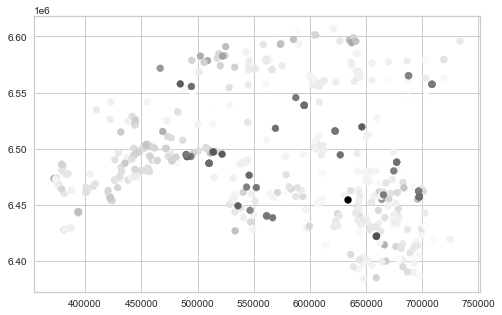

In [67]:
soc_res = gpd.GeoDataFrame(soc_sample_res, geometry='geometry', crs=from_epsg(4326))
soc_res_eest = soc_res.to_crs(from_epsg(3301))
soc_res_eest.plot(column='SOC_res')

In [62]:
# soc_res_eest.to_file(driver='ESRI Shapefile', filename=os.path.join(soc_dir, "data/soc_rf_model/soc_consolidated_samples_3301.shp"), encoding="utf-8")

soc_res_eest.to_file(r'C:\Users\y.Israfilbayov\OneDrive - Fugro\Personal Files\Education documents\University courses\Thesis\Data\soc_residuals\soc_residuals.shp', driver='ESRI Shapefile')

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18544\1291785357.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  soc_res_eest.to_file(r'C:\Users\y.Israfilbayov\OneDrive - Fugro\Personal Files\Education documents\University courses\Thesis\Data\soc_residuals\soc_residuals.shp', driver='ESRI Shapefile')


<h1>Executing Model on final Dataset<h1>

In [61]:
#preprocessing of the final data
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,soc1,bd1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,soc2,bd2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,soc3,bd3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,soc4,bd4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_fores,forest_pct,area_grass,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,7.393735,0.949777,133.21,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1808.261246,0.031453,0.026489,0.016483,12.539993,12.507403,0.453449,0.226311,0.181002,0.187266,0.025721,0.000000,0.047722,NaN,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,4.609710,1.128614,133.21,0.190833,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1042.409646,0.168890,0.141488,0.106648,8.267109,8.226672,0.818133,1.802826,1.430442,1.305622,0.154712,0.000000,0.215726,NaN,NaN,0.0,0.0,1042.409646,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,4.143324,1.165374,133.21,0.192500,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2598.934724,0.279586,0.243441,0.199833,7.830969,7.614108,1.063368,3.521166,3.206231,2.545546,0.439148,0.408638,0.362313,NaN,NaN,0.0,0.0,24.841451,0.955832,1846.755097,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,2.546418,1.311652,133.21,0.195000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4997.621962,0.531916,0.474287,0.328851,5.769673,5.732581,1.080556,7.297202,6.521130,4.471773,0.856971,0.253316,1.096561,NaN,NaN,0.0,0.0,1671.641546,33.448739,3325.980417,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,3.423959,1.227016,133.21,0.188333,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1652.049209,0.296661,0.275507,0.193926,8.204620,8.160692,0.961941,3.493085,2.991859,2.659980,0.519368,0.157721,0.978945,NaN,NaN,0.0,0.0,0.000000,0.000000,1623.649785,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [62]:
data.dtypes
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 745432 entries, 0 to 745431
Data columns (total 85 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   orig_fid    745432 non-null  int64   
 1   est_soilty  745432 non-null  object  
 2   wrb_code    745432 non-null  object  
 3   wrb_main    745432 non-null  object  
 4   est_txcode  745426 non-null  object  
 5   nlayers     745432 non-null  float64 
 6   zmx         745432 non-null  float64 
 7   z1          745432 non-null  float64 
 8   est_txt1    745426 non-null  object  
 9   lxtype1     745426 non-null  object  
 10  est_crs1    211045 non-null  object  
 11  sand1       745432 non-null  int64   
 12  silt1       745432 non-null  int64   
 13  clay1       745432 non-null  int64   
 14  rock1       745432 non-null  int64   
 15  soc1        745432 non-null  float64 
 16  bd1         745425 non-null  float64 
 17  k1          745432 non-null  float64 
 18  awc1        7449

In [63]:
#dropping unnecessary columns
estsoil = data.drop(["soc1","soc2","soc3","soc4","bd1","bd2","bd3","bd4"],axis=1)

estsoil["drain_pct"] = estsoil["drain_pct"].fillna(0)
estsoil["area_drain"] = estsoil["area_drain"].fillna(0)
estsoil  = estsoil.dropna(subset=["tri_median","ls_median","twi_median","twi_mean","slp_mean" ,"awc1"])

estsoil_ml = estsoil[["wrb_main","clay1","orig_fid","lxtype1","wetland_pc", "sand1", "k1","tri_median","grassland_",
                     "ls_median","twi_median","arable_pct","tri_mean","forest_pct","twi_mean", "drain_pct",
                     "slp_mean","awc1","area_grass", "area_fores","area_drain","area_wetla"]]

#editing typos in column names
estsoil_ml.rename(columns={'area_wetla' : 'area_wetland', 'wetland_pc' : 'wetland_pct','grassland_' : 'grassland_pct','area_fores':'area_forest','area_grass': 'area_grassland' }, inplace=True)
estsoil_ml

C:\Users\y.Israfilbayov\AppData\Local\Temp\ipykernel_18076\1558543170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estsoil_ml.rename(columns={'area_wetla' : 'area_wetland', 'wetland_pc' : 'wetland_pct','grassland_' : 'grassland_pct','area_fores':'area_forest','area_grass': 'area_grassland' }, inplace=True)


,wrb_main,clay1,orig_fid,lxtype1,wetland_pct,sand1,k1,tri_median,grassland_pct,ls_median,twi_median,arable_pct,tri_mean,forest_pct,twi_mean,drain_pct,slp_mean,awc1,area_grassland,area_forest,area_drain,area_wetland
1,FL,5,1,S,0.000000,90,133.21,0.106648,0.000000,0.215726,0.818133,0.000000,0.168890,100.000000,8.267109,0.000,1.802826,0.190833,0.000000,1042.409646,0.0,0.000000
2,FL,5,2,S,0.000000,90,133.21,0.199833,71.058156,0.362313,1.063368,0.000000,0.279586,0.955832,7.830969,0.000,3.521166,0.192500,1846.755097,24.841451,0.0,0.000000
3,FL,5,3,S,0.000000,90,133.21,0.328851,66.551261,1.096561,1.080556,0.000000,0.531916,33.448739,5.769673,0.000,7.297202,0.195000,3325.980417,1671.641546,0.0,0.000000
4,FL,5,4,S,0.000000,90,133.21,0.193926,98.280958,0.978945,0.961941,0.000000,0.296661,0.000000,8.204620,0.000,3.493085,0.188333,1623.649785,0.000000,0.0,0.000000
5,FL,5,5,S,0.000000,90,133.21,0.457811,46.029082,2.308224,1.306534,0.000000,0.758535,52.715155,6.269014,1.075,9.910546,0.188333,2140.186683,2451.064996,50.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745427,TC,15,745593,SL,0.000000,65,11.02,0.180266,0.000000,0.576101,1.435720,97.768176,0.211685,0.764902,9.202388,100.000,2.849917,0.185000,0.000000,187.522302,24516.0,0.000000
745428,TC,15,745594,SL,0.000000,65,11.02,0.147882,0.072877,0.173908,1.459142,98.712019,0.088898,0.476146,10.531633,74.237,1.161163,0.189583,26.298652,171.824167,26789.0,0.000000
745429,TC,35,745595,CL,0.000000,50,3.67,0.104897,0.000000,0.154909,1.026448,100.000000,0.076303,0.000000,10.971353,100.000,0.929807,0.191500,0.000000,0.000000,31587.0,0.000000
745430,TC,9,745596,LS,2.898868,82,37.54,0.163721,0.000000,0.145530,1.226357,0.539015,0.190334,90.123678,8.710135,0.000,1.937408,0.197500,0.000000,33430.796803,0.0,1075.316345


In [65]:
#analyzing "object" type columns
estsoil_ml.select_dtypes(include=["object"])

,wrb_main,lxtype1
1,FL,S
2,FL,S
3,FL,S
4,FL,S
5,FL,S
...,...,...
745427,TC,SL
745428,TC,SL
745429,TC,CL
745430,TC,LS


In [66]:
#one-hot encoding
dummy_estsoil_ml = pd.get_dummies(estsoil_ml, columns = ["wrb_main","lxtype1"], drop_first=True)
dummy_estsoil_ml.info
dummy_estsoil_ml.head()

,clay1,orig_fid,wetland_pct,sand1,k1,tri_median,grassland_pct,ls_median,twi_median,arable_pct,tri_mean,forest_pct,twi_mean,drain_pct,slp_mean,awc1,area_grassland,area_forest,area_drain,area_wetland,wrb_main_CM,wrb_main_FL,wrb_main_GL,wrb_main_HS,wrb_main_LP,wrb_main_LV,wrb_main_PZ,wrb_main_RG,wrb_main_RT,wrb_main_TC,wrb_main_UM,lxtype1_CL,lxtype1_GRAVELS,lxtype1_HC,lxtype1_HUMUS,lxtype1_L,lxtype1_LS,lxtype1_PEAT,lxtype1_S,lxtype1_SL,lxtype1_SiCL,lxtype1_SiL,lxtype1_no_info
1,5,1,0.0,90,133.21,0.106648,0.000000,0.215726,0.818133,0.0,0.168890,100.000000,8.267109,0.000,1.802826,0.190833,0.000000,1042.409646,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5,2,0.0,90,133.21,0.199833,71.058156,0.362313,1.063368,0.0,0.279586,0.955832,7.830969,0.000,3.521166,0.192500,1846.755097,24.841451,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,5,3,0.0,90,133.21,0.328851,66.551261,1.096561,1.080556,0.0,0.531916,33.448739,5.769673,0.000,7.297202,0.195000,3325.980417,1671.641546,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,4,0.0,90,133.21,0.193926,98.280958,0.978945,0.961941,0.0,0.296661,0.000000,8.204620,0.000,3.493085,0.188333,1623.649785,0.000000,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5,5,0.0,90,133.21,0.457811,46.029082,2.308224,1.306534,0.0,0.758535,52.715155,6.269014,1.075,9.910546,0.188333,2140.186683,2451.064996,50.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
# selecting required columns
estsoil_ml_final = dummy_estsoil_ml[["wrb_main_HS","clay1","orig_fid", "lxtype1_PEAT","wetland_pct","sand1","k1","tri_median", "grassland_pct",
                    "ls_median", "twi_median","arable_pct", "tri_mean", "forest_pct","twi_mean", "drain_pct","slp_mean",
                    "awc1","area_grassland","area_forest","area_drain","area_wetland"]]
estsoil_ml_final

,wrb_main_HS,clay1,orig_fid,lxtype1_PEAT,wetland_pct,sand1,k1,tri_median,grassland_pct,ls_median,twi_median,arable_pct,tri_mean,forest_pct,twi_mean,drain_pct,slp_mean,awc1,area_grassland,area_forest,area_drain,area_wetland
1,0,5,1,0,0.000000,90,133.21,0.106648,0.000000,0.215726,0.818133,0.000000,0.168890,100.000000,8.267109,0.000,1.802826,0.190833,0.000000,1042.409646,0.0,0.000000
2,0,5,2,0,0.000000,90,133.21,0.199833,71.058156,0.362313,1.063368,0.000000,0.279586,0.955832,7.830969,0.000,3.521166,0.192500,1846.755097,24.841451,0.0,0.000000
3,0,5,3,0,0.000000,90,133.21,0.328851,66.551261,1.096561,1.080556,0.000000,0.531916,33.448739,5.769673,0.000,7.297202,0.195000,3325.980417,1671.641546,0.0,0.000000
4,0,5,4,0,0.000000,90,133.21,0.193926,98.280958,0.978945,0.961941,0.000000,0.296661,0.000000,8.204620,0.000,3.493085,0.188333,1623.649785,0.000000,0.0,0.000000
5,0,5,5,0,0.000000,90,133.21,0.457811,46.029082,2.308224,1.306534,0.000000,0.758535,52.715155,6.269014,1.075,9.910546,0.188333,2140.186683,2451.064996,50.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745427,0,15,745593,0,0.000000,65,11.02,0.180266,0.000000,0.576101,1.435720,97.768176,0.211685,0.764902,9.202388,100.000,2.849917,0.185000,0.000000,187.522302,24516.0,0.000000
745428,0,15,745594,0,0.000000,65,11.02,0.147882,0.072877,0.173908,1.459142,98.712019,0.088898,0.476146,10.531633,74.237,1.161163,0.189583,26.298652,171.824167,26789.0,0.000000
745429,0,35,745595,0,0.000000,50,3.67,0.104897,0.000000,0.154909,1.026448,100.000000,0.076303,0.000000,10.971353,100.000,0.929807,0.191500,0.000000,0.000000,31587.0,0.000000
745430,0,9,745596,0,2.898868,82,37.54,0.163721,0.000000,0.145530,1.226357,0.539015,0.190334,90.123678,8.710135,0.000,1.937408,0.197500,0.000000,33430.796803,0.0,1075.316345


In [68]:
#checking null values
estsoil_ml_final.isnull().sum()

wrb_main_HS       0
clay1             0
orig_fid          0
lxtype1_PEAT      0
wetland_pct       0
sand1             0
k1                0
tri_median        0
grassland_pct     0
ls_median         0
twi_median        0
arable_pct        0
tri_mean          0
forest_pct        0
twi_mean          0
drain_pct         0
slp_mean          0
awc1              0
area_grassland    0
area_forest       0
area_drain        0
area_wetland      0
dtype: int64

In [69]:
estsoil_ml_final.shape

(737391, 22)

In [70]:
# running model on final data
values = estsoil_ml_final.values

display(values.shape)
Prediction = regressor.predict(values)

estsoil['SOC_pred'] = Prediction

display(estsoil.sample(10))

(737391, 22)

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arabl,arable_pct,area_fores,forest_pct,area_grass,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,SOC_pred
375071,375073,Kor,CM-skn.can,CM,v⁰₁sl40-60/p,2.0,1000.0,500.0,sl,LS,v⁰,82,9,9,6,37.54,0.196875,1000.0,p,GRAVELS,p,100.0,0.0,0.0,85.0,645.68,0.186875,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,154007.285100,0.098453,0.065029,0.129855,9.718368,9.840838,1.103673,1.152444,0.859931,1.209317,0.105093,0.089888,0.121620,66062.0,42.895,79971.439054,51.927049,44.230601,0.028720,21972.842343,14.267405,0.0,0.0,45978.052701,29.854466,0.0,0.0,6383.260681,4.144778,"POLYGON ((596120.850 6499268.600, 596138.250 6...",18.018238
392503,392506,Kr,RG-sk.ca,RG,r₃ls₂,1.0,1000.0,1000.0,ls2,L,r,55,30,15,25,9.04,0.192083,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,18909.377575,0.097300,0.096124,0.035054,9.858488,9.752636,0.682851,1.423038,1.436646,0.551019,0.151537,0.163358,0.133948,9477.0,50.119,14703.977560,77.760241,81.845049,0.432828,1031.995290,5.457585,0.0,0.0,3091.559676,16.349347,0.0,0.0,0.000000,0.000000,"POLYGON ((565554.086 6553711.667, 565545.700 6...",17.870757
115827,115828,GI,GL-eu-lv,GL,pl/s,2.0,1000.0,500.0,pl,S,None,90,3,7,0,113.71,0.193750,1000.0,s,C,None,25.0,30.0,45.0,0.0,4.29,0.180000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,9112.375850,0.030210,0.030231,0.011692,10.788201,10.716907,0.492641,0.415553,0.406824,0.205284,0.058637,0.064682,0.062262,9112.0,100.000,9112.375850,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((560256.360 6497634.435, 560250.850 6...",16.072118
517809,510084,LkIe,RT-ab.dy,RT,l,1.0,1000.0,1000.0,l,S,None,90,5,5,0,133.21,0.188750,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,25058.002253,0.299710,0.298103,0.131882,6.799303,6.503003,1.397167,4.611413,4.687486,2.154764,0.800199,0.693648,0.711963,0.0,0.000,9433.372157,37.646146,12228.277976,48.799892,3396.352119,13.553962,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((662655.120 6442546.840, 662660.950 6...",12.855296
625573,625435,LPg,UM-gln.stp.rt.lv,UM,sl,1.0,1000.0,1000.0,sl,LS,None,82,9,9,0,37.54,0.183889,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,12004.069963,0.123821,0.093581,0.097088,8.877920,8.930237,1.123149,1.393097,1.067499,1.122473,0.088790,0.057883,0.101495,12004.0,100.000,0.000000,0.000000,12004.069963,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((557756.535 6450427.470, 557748.060 6...",17.695869
657337,657334,M',HS-sa,HS,t₃/l,2.0,1000.0,500.0,t3,PEAT,None,15,15,70,0,9.20,0.197500,1000.0,l,S,None,90.0,5.0,5.0,0.0,133.21,0.185000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,606.997413,0.339500,0.343038,0.100378,6.560976,6.411260,0.876230,4.934366,5.095556,1.771263,0.513230,0.658123,0.389609,0.0,0.000,0.000000,0.000000,606.997413,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((635794.850 6437268.500, 635791.300 6...",10.442949
341037,341039,Ko,CM-can,CM,l/vl,2.0,1000.0,500.0,l,S,None,90,5,5,0,133.21,0.188750,1000.0,l,S,v,90.0,5.0,5.0,85.0,133.21,0.175000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,

In [71]:
estsoil.to_file('data/estsoil_soc_pred.shp', encoding='utf-8')

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
